In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1.	What is the most frequently occurring wine quality? What is the highest number in and the lowest number in the quantity column?

In [86]:
df=pd.read_csv('wine_data.csv')
print(df.groupby(quality)["quality"].sum())
print("highest is:6 with 3828 instances")
print("lowest is:3 with 30 instance")


quality
3      30
4     212
5    3405
6    3828
7    1393
8     144
Name: quality, dtype: int64
highest is:6 with 3828 instances
lowest is:3 with 30 instance


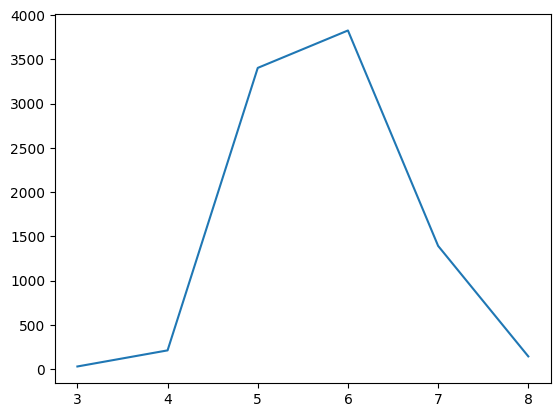

In [74]:
plt.plot(df.groupby(quality)["quality"].sum())
plt.show()

2.	How is `fixed acidity` correlated to the quality of the wine? How does the alcohol content affect the quality? How is the `free Sulphur dioxide` content correlated to the quality of the wine?

In [75]:
correlation1 = df['fixed acidity'].corr(df['quality'])
print(f"Correlation between fixed acidity and quality: {correlation1:.2f}")
correlation2=df["free sulfur dioxide"].corr(df['quality'])
print(f"Correlation between free Sulphur dioxide and quality: {correlation2:.2f}")
correlation3=df["alcohol"].corr(df['quality'])
print(f"Correlation between alcohol and quality: {correlation3:.2f}")

Correlation between fixed acidity and quality: 0.12
Correlation between free Sulphur dioxide and quality: -0.05
Correlation between alcohol and quality: 0.48


3.	What is the average `residual sugar` for the best quality wine and the lowest quality wine in the dataset?

In [76]:
sugar=df.groupby("quality")["residual sugar"].mean()
#print(sugar)
print(sugar.sort_values())
print("for lowest quality(3) average residual sugar is:",sugar[3])
print("for highest quality(8)",sugar[8])

quality
6    2.477194
5    2.528855
8    2.577778
3    2.635000
4    2.694340
7    2.720603
Name: residual sugar, dtype: float64
for lowest quality(3) average residual sugar is: 2.6350000000000002
for highest quality(8) 2.5777777777777775


4.	Does `volatile acidity` has an effect over the quality of the wine samples in the dataset?

In [77]:
correlation4=df["volatile acidity"].corr(df['quality'])
print(f"Correlation between fixed volatile acidity and quality: {correlation4:.2f}")


Correlation between fixed volatile acidity and quality: -0.39


5.	Train a Decision Tree model and Random Forest Model separately to predict the Quality of the given samples of wine. Compare the Accuracy scores for both models.

Decision

In [78]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



In [83]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error
y_pred=classifier.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

0.4725


In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

print(cm)
accuracy_score(y_test,y_pred)

[[  0   1   1   0   0   0]
 [  1   3   6   3   1   0]
 [  3  11 109  39   7   0]
 [  2   4  35 110  19   0]
 [  0   1   4  12  20   3]
 [  0   0   0   1   4   0]]


0.605

Random Forest

In [85]:
Xr=df.iloc[:,:-1]
yr=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
Xr_train,Xr_test,yr_train,yr_test=train_test_split(Xr,yr,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xr_train=sc.fit_transform(Xr_train)
Xr_test=sc.transform(Xr_test)
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
classifier.fit(Xr_train,yr_train)
from sklearn.metrics import mean_absolute_error
yr_pred=classifier.predict(Xr_test)
print(mean_absolute_error(yr_test,yr_pred))
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(yr_test,yr_pred)
print(cm)
accuracy_score(yr_test,yr_pred)


0.38
[[  0   0   0   2   0   0]
 [  0   0  10   4   0   0]
 [  0   0 136  29   4   0]
 [  0   2  45 108  15   0]
 [  0   0   3  15  22   0]
 [  0   0   0   1   4   0]]


0.665